<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%EC%94%A8%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석



---



## 3.구씨를 찾아라! EDA 분석하기

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./sample_data/성씨ㆍ본관별_인구__시군구_20230510101129.csv

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [3]:
파일이름 = './sample_data/성씨ㆍ본관별_인구__시군구_20230829111454.csv'
df = pd.read_csv(파일이름, encoding='cp949')
df

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 변경하기

In [4]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [5]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns

Index(['성씨', '지역', '인구'], dtype='object')

#### @고유한 성씨만 출력하기

In [ ]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])                 # set:집합으로 만들어 줌
# df['성씨']

In [7]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']) )

155

In [8]:
# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
familyname = set(name.split('(')[0] for name in set(df['성씨']) )       # (를 기준으로 split하고 그 앞([0])만 가져오고 나머지는 name에 넣는다.
print(f'한글 성씨 목록: {familyname}')

# 고유한 한글 성씨 총개수 출력하기
print(f'한글 성씨 개수: {len(familyname)}')

한글 성씨 목록: {'고', '용', '팽', '방', '선', '진', '원', '형', '남궁', '함', '유', '민', '인', '이', '한', '석', '문', '공', '탁', '오', '현', '주', '승', '라', '목', '조', '상', '임', '김', '경', '왕', '맹', '설', '백', '위', '감', '정', '모', '마', '채', '기', '당', '연', '장', '기타', '성', '피', '황보', '신', '시', '박', '복', '길', '견', '홍', '빈', '남', '단', '송', '갈', '안', '권', '곽', '범', '계', '반', '최', '봉', '양', '편', '심', '음', '지', '은', '여', '육', '변', '사', '예', '천', '차', '좌', '허', '윤', '황', '온', '선우', '제', '배', '강', '제갈', '두', '표', '추', '도', '가', '나', '태', '노', '하', '류', '호', '국', '옥', '동', '엄', '서문', '염', '전', '손', '어', '우', '간', '소', '사공', '명', '구', '서', '부', '금'}
한글 성씨 개수: 120


---------------------

#### @[성씨]가  '구'인 데이터 추출하기

In [ ]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['성씨'].str.contains('구')]
df.query("성씨.str.contains('구')")

# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
# df_goo = df[ (df['성씨'].str.contains('구')) & (df['지역'].str != '전국') ]
df_goo = df.query("성씨.str.contains('구') & (지역 != '전국') ")
df_goo

**### [실습문제] 자신의 성씨 데이터 출력하기**


In [10]:
df_my = df[df['성씨'].str.contains('홍')]
print(df_my)

        성씨       지역      인구
2697  홍(洪)       전국  558853
2698  홍(洪)    서울특별시  117677
2699  홍(洪)    부산광역시   26854
2700  홍(洪)    대구광역시   22936
2701  홍(洪)    인천광역시   34766
2702  홍(洪)    광주광역시   12944
2703  홍(洪)    대전광역시   16362
2704  홍(洪)    울산광역시    9626
2705  홍(洪)  세종특별자치시    3233
2706  홍(洪)      경기도  156297
2707  홍(洪)      강원도   25164
2708  홍(洪)     충청북도   20070
2709  홍(洪)     충청남도   22983
2710  홍(洪)     전라북도   17040
2711  홍(洪)     전라남도   13726
2712  홍(洪)     경상북도   22544
2713  홍(洪)     경상남도   25048
2714  홍(洪)  제주특별자치도   11583


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [ ]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)
df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False)
df_goo_group

**### [실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [ ]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
# 1.'홍'씨 데이터를 [지역]별 합계 구하기
df_my_group = df_my.groupby('지역').sum()
df_my_group = df_my.groupby('지역').sum(numeric_only=False)
df_my_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)
df_my_group



---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [13]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

### [실습문제]  (코랩) 그래프에서 한글이 깨져서 보입니다. 한글이 나타나도록 만들어보세요.

In [16]:
# 1. (코랩) 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

# 3. 런타입 후에는 앞에서 실행한 셀을 다시 실행해야한다.
#    (메모리에 있던 정보가 재실행하면 없어졌기때문에)

# 4. 한글폰트 지정하기
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

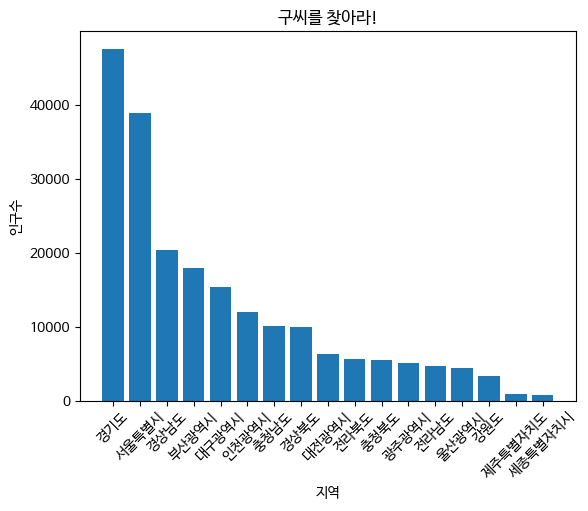

In [22]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index   # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title('구씨를 찾아라!') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

#### @그래프 꾸미기

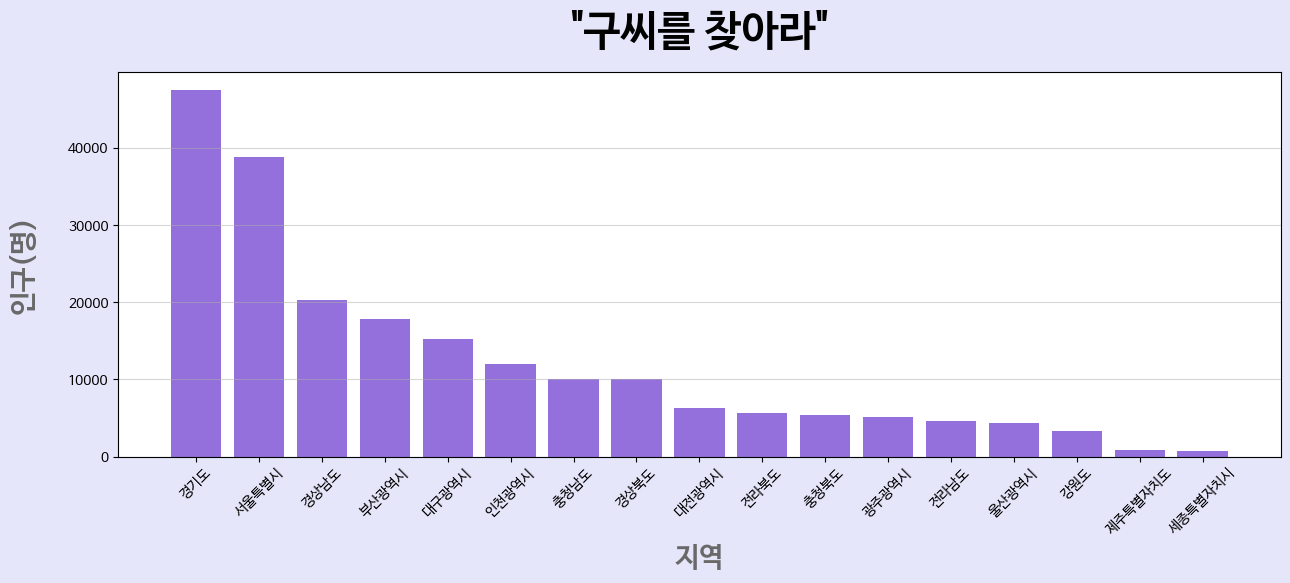

In [23]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index   # 지역
y = df_goo_group['인구']  # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

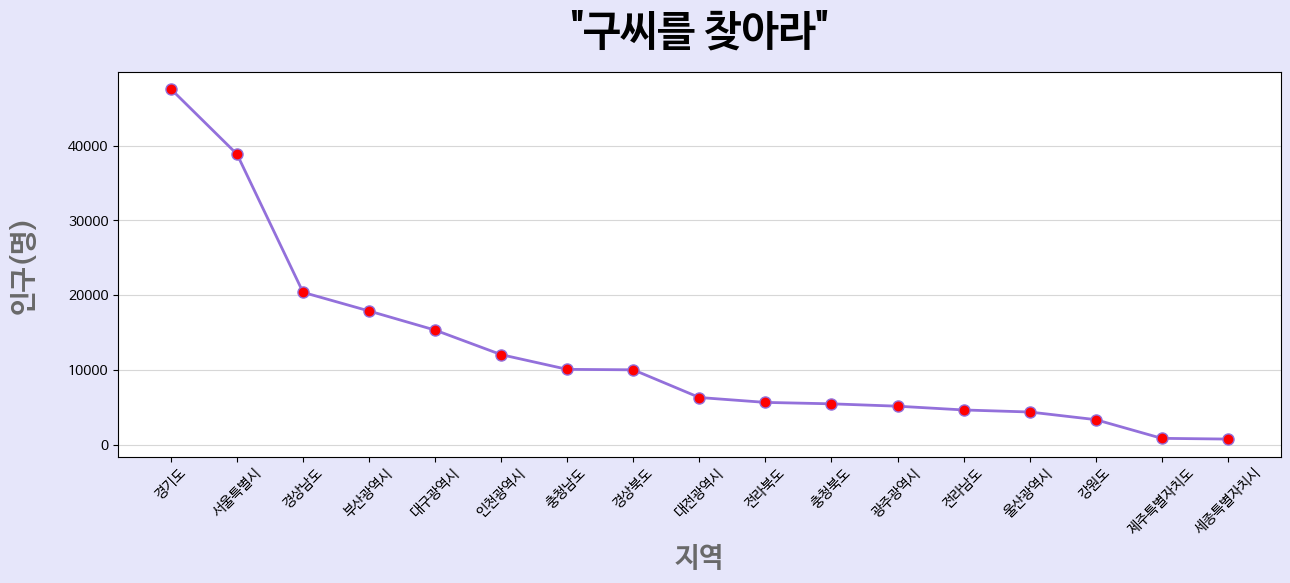

In [24]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index # 지역
y = df_goo_group['인구'] # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

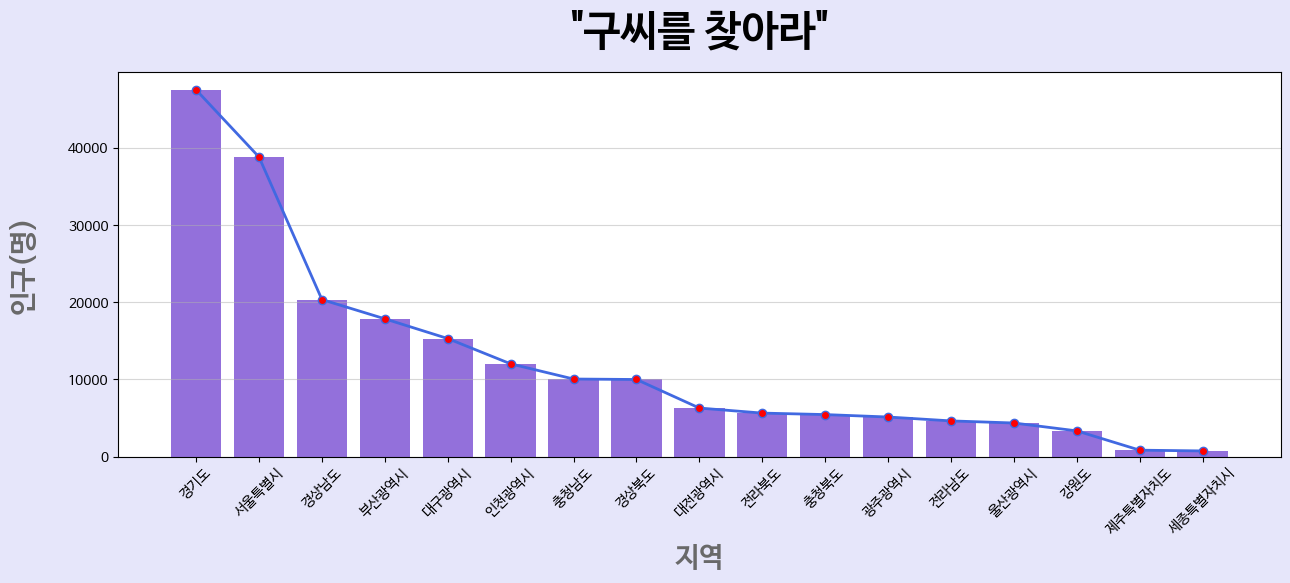

In [25]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index # 지역
y = df_goo_group['인구'] # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [26]:
# 파일명 지정하여 저장하기
file = './sample_data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

**### [실습문제] 워드클라우드로 시각화하기**

In [20]:
# 라이브러리 설치하기
!pip install wordcloud

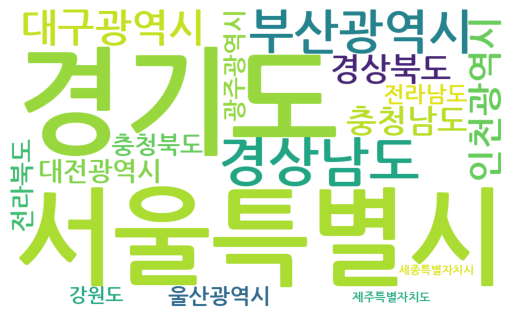

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역
counts = df_goo_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./구씨_워드클라우드.png')



---



### **[[미션]] **
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

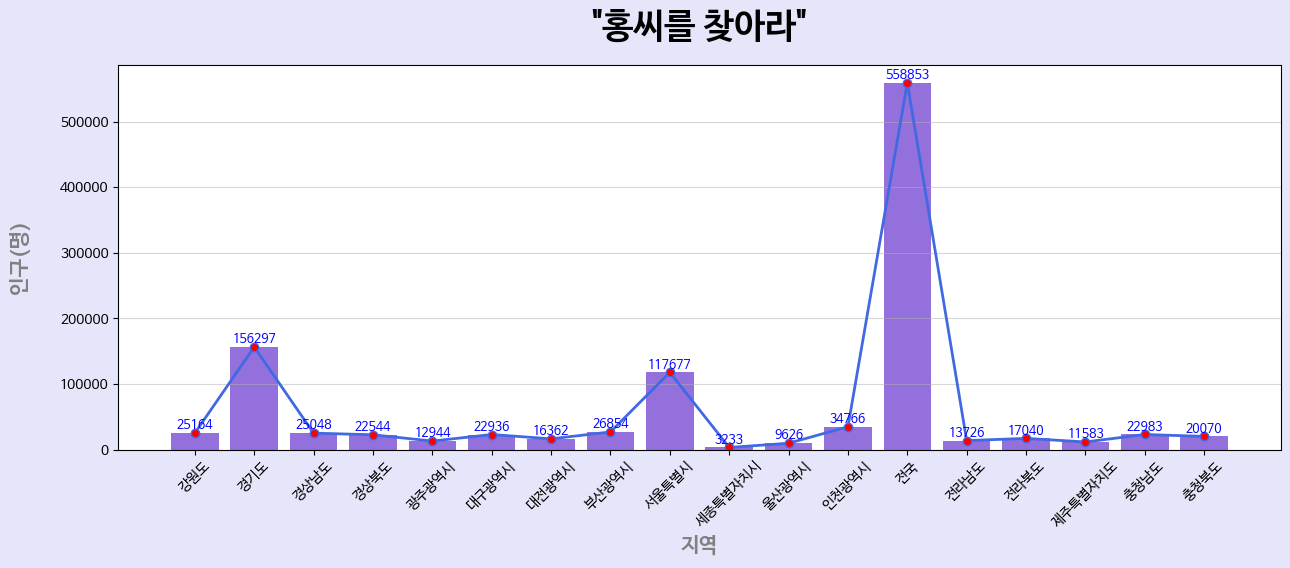

In [56]:
df_my_group = df_my.groupby('지역').sum(numeric_only=False)

x = df_my_group.index
y = df_my_group['인구']

plt.figure(figsize = (15, 5), facecolor = 'lavender')
plt.bar(x, y, color = 'mediumpurple')
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

plt.title('"홍씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':25, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 15, 'color': 'gray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 15, 'color': 'gray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9,
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

----------------------------------

THE END